In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

In [2]:
# Size of the grid: size
# Exponent p (eta) - in the probability formula
# Place the first virus at position x_start, y_start
def simulate(size, p, x_start, y_start):
    temp_values = []

    n = 4000 # Number of viruses
    nVirus = 1

    # Food concentration array
    C = np.zeros((size, size))
    temp = np.zeros((size, size))

    # Setting omega parameter
    w = 1.89

    # Grow array marks  locations where the viruses grow
    grow = np.zeros((size, size))
    grow[x_start, y_start] = 1

    # Setting default food
    for i in range(1, size - 1):
        for j in range(1, size - 1):
            C[i, j] = 1

    C[x_start, y_start] = 0

    while True:
        candidate = np.zeros((size, size))
        sumOfChance = 0
                
        # SOR method to calculate at step k+1
        for i in range(1, size - 1):
            for j in range(1, size - 1):
                if C[i, j] != 0:
                    C[i, j] = (w/4) * (C[i+1, j] + C[i-1, j] 
                    + C[i, j+1] + C[i, j-1]) + (1-w) * C[i, j]

                if C[i, j] < 0:
                    temp[i, j] = 0
                else:
                    temp[i, j] = C[i, j]

        # Find candidates
        for i in range(1, size - 1): 
            for j in range(1, size - 1):
                if grow[i, j] == 1:
                    C[i, j] = 0
                    if grow[i-1, j] == 0 and candidate[i-1, j] == 0:
                        candidate[i-1, j] = 1
                    if grow[i+1, j] == 0 and candidate[i+1, j] == 0:
                        candidate[i+1, j] = 1
                    if grow[i, j-1] == 0 and candidate[i, j-1] == 0:
                        candidate[i, j-1] = 1
                    if grow[i, j+1] == 0 and candidate[i, j+1] == 0:
                        candidate[i, j+1] = 1

        # Calculate the denominator of P
        for i in range(1, size - 1):
            for j in range(1, size - 1):
                if candidate[i, j] == 1:
                    sumOfChance += C[i, j]**p

        # Random grow
        for i in range(1, size - 1):
            for j in range(1, size - 1):
                if candidate[i, j] == 1:
                    randPos = np.random.rand() / 10
                    curChance = (C[i, j]**p) / sumOfChance
                    if randPos < curChance:
                        grow[i, j] = 1
                        if nVirus < 4000:
                            nVirus += 1
                            
        temp_values.append(temp.copy())
        print(nVirus, end="\r")
        
        if nVirus == 4000:
            return temp_values
            break

In [3]:
def run_sim(size = 201, p = 2, x_start = 2, y_start = 100, name = ''):
    filename = '{0}x{0}p{1}plot{2}'.format(size-1, p, name)
    try:
        # Load the array from the file if exist
        temp_values = np.load('data/' + filename + '.npy')
    except FileNotFoundError:
        temp_values = simulate(size, p, x_start, y_start)
        np.save('data/' + filename + '.npy', temp_values)

    temp = temp_values[-1]
    
    x = np.arange(size)
    y = np.arange(size)
    X, Y = np.meshgrid(x, y)

    fig, (ax, ax_top) = plt.subplots(1, 2, figsize=(10, 5)
                        , subplot_kw={'projection': '3d'})
    ax.plot_surface(X, Y, temp, cmap='jet')
    ax.view_init(azim=-120, elev=30)
    
    ax_top.contourf(X, Y, temp, cmap='jet')
    ax_top.view_init(azim=-90, elev=90)
    ax_top.set_zticks([])
    
    plt.savefig(filename + '.png', transparent=True)
    plt.show(block=False)

In [4]:
# Make directory
path = "data"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
   os.makedirs(path)

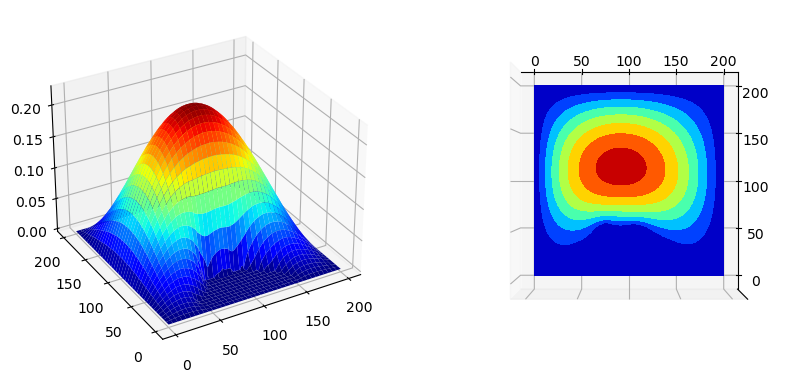

In [9]:
run_sim(p = 0)
# animate(p = 0)

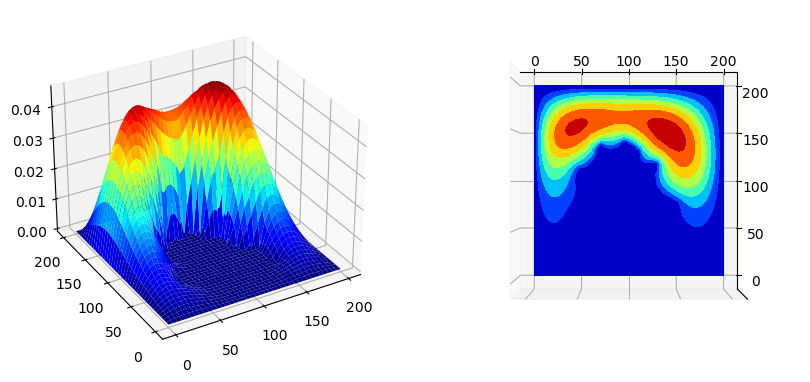

In [10]:
run_sim(p = 1)

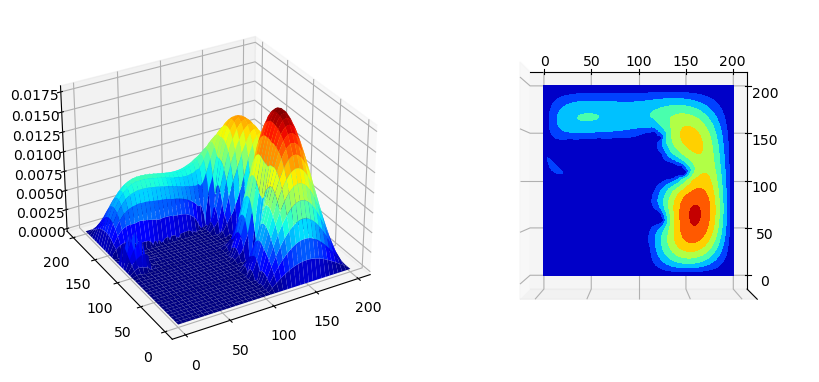

In [11]:
temp2 = run_sim(p = 2)

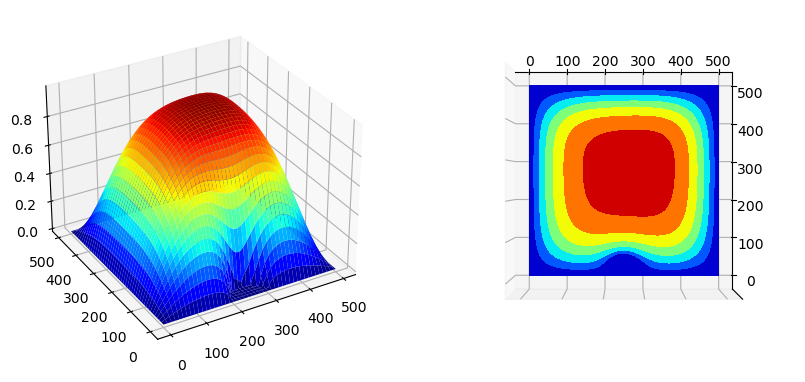

In [12]:
run_sim(size = 501, p = 0, x_start = 2, y_start = 250)

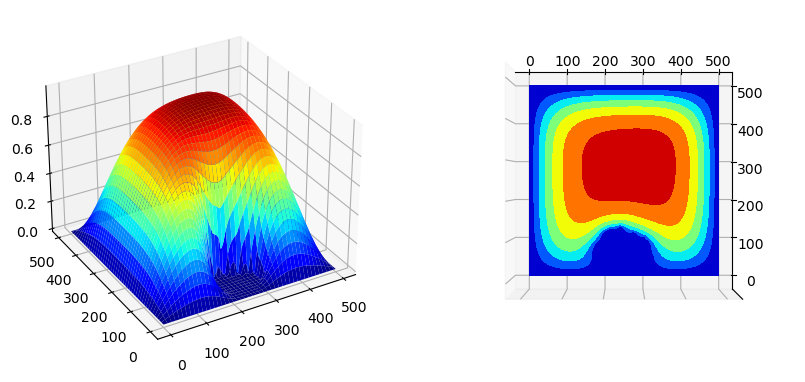

In [13]:
run_sim(size = 501, p = 1, x_start = 2, y_start = 250)

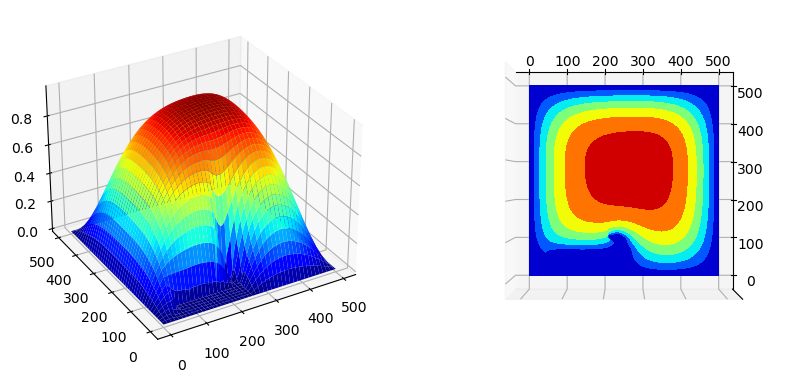

In [14]:
run_sim(size = 501, p = 2, x_start = 2, y_start = 250)

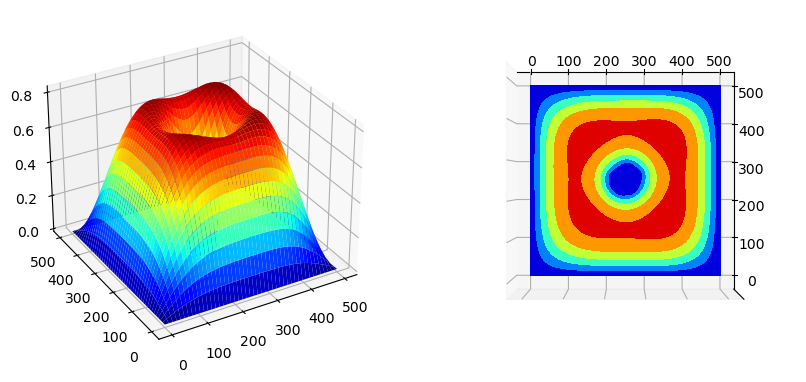

In [15]:
run_sim(size = 501, p = 0, x_start = 250, y_start = 250, name = '-mid')

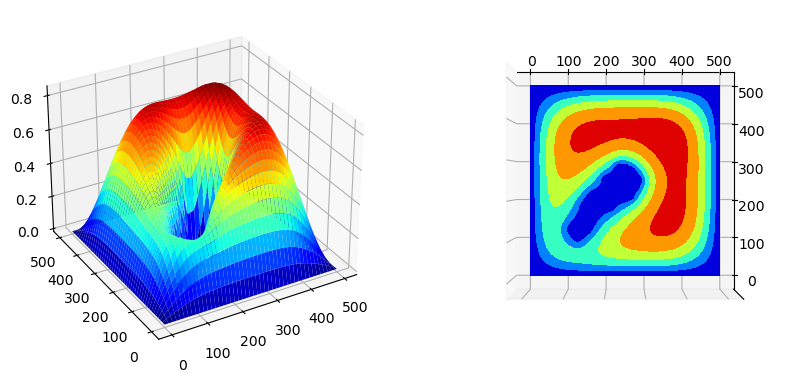

In [16]:
run_sim(size = 501, p = 1, x_start = 250, y_start = 250, name = '-mid')

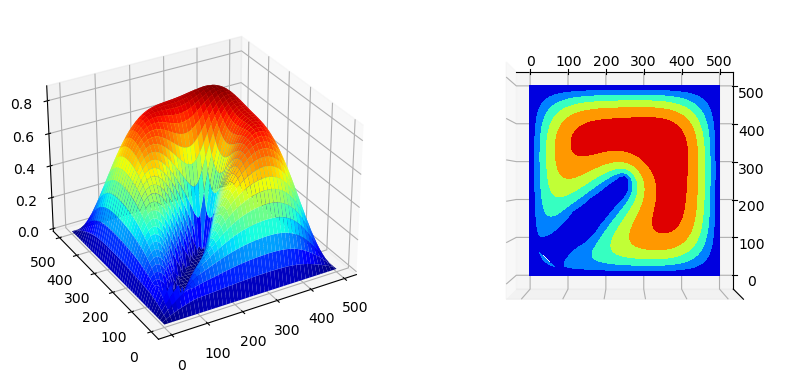

In [17]:
run_sim(size = 501, p = 2, x_start = 250, y_start = 250, name = '-mid')